# [COOKBOOK v1.0] Exploratory Data Analysis with Python | MSM c. 2021

***Author: David White, Mister Shepherd Media LLC, New York, NY | david@msmdesign.nyc***

## 0. Setup the workspace

### 0.1 | Import Numpy, pandas and Matplotlib

In [2]:
# import the libraries needed for data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0.2a | Load data from GitHub (raw csv)

In [3]:
# load the data from the csv file (hosted on Github) and assign it to a variable

df_a = pd.read_csv('https://raw.githubusercontent.com/davidwhitemsm/selected-open-datasources/master/titanic.csv', encoding='utf-8')

### 0.2b | Load data from local machine

In [4]:
# read from local csv file

df_b = pd.read_csv(r'C:\Users\david\OneDrive\Desktop\coding_sandbox\titanic.csv', encoding='utf-8')

In [5]:
# read from local Excel file

df_xlsx = pd.read_excel(r'C:\Users\david\OneDrive\Desktop\coding_sandbox\titanic.xlsx', sheet_name='titanic') # or sheet_name=0

# in both examples, note the "r" immediately before the file path. this prevents the unicode escape error

### 0.2c | Load data from json using NYC Open Data API

In [6]:
# import the library needed to load json data from the Socrata api

from sodapy import Socrata

In [7]:
# load the json data and store it in a variable

client = Socrata("data.cityofnewyork.us", None)

# First 2000 results, returned as JSON from API / converted to Python list of dictionaries by sodapy.

# on nyc open data page click on "API Docs", scroll to bottom of page, copy code snippet for "Python Pandas"
# the "9b9u-8989" key is unique to this particular data set

results = client.get("9b9u-8989", limit=2000)

# Convert to pandas DataFrame
df_c = pd.DataFrame.from_records(results)

### 0.2d | Load data from Google BigQuery

In [116]:
# conda install -c conda-forge pandas-gbq

# import pandas_gbq

# TODO: Set project_id to your Google Cloud Platform project ID. 
# project_id = "my-project"

# sql = """ 
# SELECT *
# FROM `bigquery-public-data.utility_us.country_code_iso`  
# """ 
# df = pandas_gbq.read_gbq(sql, project_id=project_id)

### 0.3a | Print the first (n) rows of the DataFrame (default is 5 rows)

In [8]:
# confirm that the data has loaded correctly by displaying the first few rows of the DataFrame

df_a.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### 0.3b | Print the last (n) rows of the DataFrame (default is 5 rows)

In [9]:
# confirm that the data has loaded correctly by displaying the last few rows of the DataFrame

df_a.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


## 1. Wrap our heads around the dataset

### 1.1 | Print the number of rows and columns contained in the DataFrame

In [10]:
# how many rows and how many columns are contained in our dataset?

df_a.shape

(887, 8)

### 1.2 | Print the index of the Data Frame

In [11]:
# what is the index (list of row labels) for our dataset?

df_a.index

RangeIndex(start=0, stop=887, step=1)

### 1.3 | List the DataFrame's column names

In [12]:
# what are the columns of our dataset?

df_a.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### 1.4 | Print a description of each of the DataFrame's columns

In [13]:
# what type of data is being stored in each column of our DataFrame?
# which columns (if any) are missing data?

df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### 1.5 | Summarize the dataset's null values by each column

In [14]:
df_c.isnull().sum()

establishment_record_dba                          0
establishment_record_establishment_street         0
establishment_record_establishment_zip            0
establishment_record_establishment_borough        0
establishment_record_business_sector           1204
establishment_record_establishment_category    1088
establishment_record_actual_opening_date        182
number_of_employees                             209
establishment_record_type_of_cuisine           1275
dtype: int64

### 1.6a | Cast series to a numerical data type

In [15]:
# let's adjust the data types of our columns so we can better analyze the data

df_c['number_of_employees'] = pd.to_numeric(df_c['number_of_employees'], errors='coerce')

### 1.6b | Cast series to a categorical data type

In [16]:
df_c['establishment_record_establishment_category'] = df_c['establishment_record_establishment_category'].astype('category')

### 1.6c | Cast series to a datetime data type

In [17]:
df_c['establishment_record_actual_opening_date'] = pd.to_datetime(df_c['establishment_record_actual_opening_date'], errors='coerce')

### 1.6d | Cast series to a boolean data type

In [18]:
df_a['Survived'] = df_a['Survived'].astype('bool')

### 1.6e | Cast series to a string data type

In [19]:
df_a['Pclass'] = df_a['Pclass'].astype('string')

### 1.6f | Cast series to an object data type

In [20]:
df_a['Pclass'] = df_a['Pclass'].astype('object')

### 1.7 | Print the number of null values for each column

In [21]:
df_c.isnull().sum()

establishment_record_dba                          0
establishment_record_establishment_street         0
establishment_record_establishment_zip            0
establishment_record_establishment_borough        0
establishment_record_business_sector           1204
establishment_record_establishment_category    1088
establishment_record_actual_opening_date        182
number_of_employees                             209
establishment_record_type_of_cuisine           1275
dtype: int64

### 1.7a | Find the earliest date

In [22]:
df_c['establishment_record_actual_opening_date'].min()

Timestamp('2005-01-01 00:00:00')

### 1.7b | Find the most recent date

In [23]:
df_c['establishment_record_actual_opening_date'].max()

Timestamp('2018-09-14 00:00:00')

### 1.8a | Summarize all numerical variables in the dataset

In [24]:
# display summary statistics for the numerical variables contained in our dataset

df_a.describe(include=[np.number])

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.00000
mean,29.471443,0.525366,0.383315,32.30542
std,14.121908,1.104669,0.807466,49.78204
min,0.420000,0.000000,0.000000,0.00000
25%,20.250000,0.000000,0.000000,7.92500
50%,28.000000,0.000000,0.000000,14.45420
75%,38.000000,1.000000,0.000000,31.13750
max,80.000000,8.000000,6.000000,512.32920


### 1.8b | Summarize all categorical variables in the dataset

In [25]:
# calculate summary statistics for our dataset's categorical variables

df_c.describe(include=['category'])

,establishment_record_establishment_category
count,912
unique,16
top,Restaurants and Other Eating Places
freq,738


### *Exemplar copy for published analysis, section 1.:*


**First impressions of our dataset:**

- our dataset is 9 columns wide and 5226 rows long
- each row is a business
- several of the columns contain information on the different categories that each business falls into
- some of the categorical data is missing or null
- the muneric columns are 'Actual Opening Date' and 'Number of Employees'
- some of the numerical data is missing or null

## 2. Identify and subset the data that's relevant to our research

### 2.1a | Select data using .loc

In [26]:
# select the columns (all rows) we want to explore further and store them in a variable

df_c2 = df_c.loc[:,['establishment_record_dba','establishment_record_establishment_borough', 
                    'establishment_record_business_sector', 'establishment_record_actual_opening_date', 
                    'number_of_employees']]

In [27]:
df_c2.columns

Index(['establishment_record_dba',
       'establishment_record_establishment_borough',
       'establishment_record_business_sector',
       'establishment_record_actual_opening_date', 'number_of_employees'],
      dtype='object')

### 2.1b | Select data using .iloc

In [28]:
df_c3 = df_c2.iloc[100:111,2:5]

In [29]:
df_c3

,establishment_record_business_sector,establishment_record_actual_opening_date,number_of_employees
100,NaN,NaT,75.0
101,NaN,NaT,5.0
102,NaN,NaT,2.0
103,NaN,NaT,20.0
104,NaN,NaT,2.0
105,NaN,NaT,2.0
106,NaN,NaT,40.0
107,NaN,NaT,4.0
108,NaN,NaT,10.0
109,NaN,NaT,15.0


### 2.2a | Select data based on a single condition

In [30]:
# example using a categorical variable

df_females = df_a.loc[df_a['Sex']=='female']

In [31]:
df_females

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,True,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
...,...,...,...,...,...,...,...,...
876,True,2,Mrs. William (Imanita Parrish Hall) Shelley,female,25.0,0,1,26.0000
878,False,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
881,False,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
883,True,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


In [32]:
# example using a numerical variable

dfy = df_a.loc[df_a['Age']<=18]

In [33]:
dfy

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,False,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
9,True,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708
10,True,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
14,False,3,Miss. Hulda Amanda Adolfina Vestrom,female,14.0,0,0,7.8542
16,False,3,Master. Eugene Rice,male,2.0,4,1,29.1250
...,...,...,...,...,...,...,...,...
851,True,3,Mrs. Sam (Leah Rosen) Aks,female,18.0,0,1,9.3500
859,False,3,Miss. Dorothy Edith Sage,female,14.0,8,2,69.5500
865,True,3,Master. Harold Theodor Johnson,male,4.0,1,1,11.1333
871,True,3,Miss. Adele Kiamie Najib,female,15.0,0,0,7.2250


### 2.2b | Select data based on multiple conditions

In [34]:
df_women_and_children = df_a.loc[(df_a['Sex']=='female') | (df_a['Age'] < 18)]

# --logical operators--
# and: &
# or: |
# equal to: ==
# not equal to: !=

In [35]:
df_women_and_children

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,True,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,True,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,True,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
7,False,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,True,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
...,...,...,...,...,...,...,...,...
876,True,2,Mrs. William (Imanita Parrish Hall) Shelley,female,25.0,0,1,26.0000
878,False,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
881,False,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
883,True,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000


### 2.3 | Select data using a substring method and a boolean mask

In [36]:
# first, cast the series as a string dtype if it is not aslready

df_a['Name'] = df_a['Name'].astype('string')

In [37]:
patricks = df_a['Name'].str.contains('Patrick')

In [38]:
df_a[patricks]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
115,False,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
507,True,3,Mr. Eugene Patrick Daly,male,29.0,0,0,7.7500
514,False,3,Mr. Patrick Ryan,male,30.0,0,0,24.1500
626,False,3,Mr. Patrick D O'Connell,male,18.0,0,0,7.7333
886,False,3,Mr. Patrick Dooley,male,32.0,0,0,7.7500


### 2.4 | Select data using the .isin method

In [39]:
# first, create a mask

bridge_and_tunnel = df_c['establishment_record_establishment_borough'].isin(['Brooklyn', 'Bronx', 'Queens', 'Staten Island'])

# then apply the mask to the original DataFrame

df_c[bridge_and_tunnel]

,establishment_record_dba,establishment_record_establishment_street,establishment_record_establishment_zip,establishment_record_establishment_borough,establishment_record_business_sector,establishment_record_establishment_category,establishment_record_actual_opening_date,number_of_employees,establishment_record_type_of_cuisine
1,Palermo Salumeria,33-35 Francis Lewis Blvd,11358,Queens,NaN,NaN,NaT,NaN,NaN
3,Cultural Xchange,35 Lafayette Ave,11217,Brooklyn,NaN,NaN,NaT,3.0,NaN
4,ST. JOHNS CHURCH,90-37 213 Street,11428,Queens,NaN,NaN,NaT,NaN,NaN
6,Marmar Restaurant,370 Forest Ave.,10301,Staten Island,Accommodations and Food,Restaurants and Other Eating Places,2017-01-21,NaN,Mediterranean
7,Celestiano,562 Halsey Street,11233,Brooklyn,NaN,NaN,NaT,6.0,NaN
...,...,...,...,...,...,...,...,...,...
1994,Twist and Smash'd,34-02 Steinway Street,11101,Queens,Accommodations and Food,Restaurants and Other Eating Places,2014-05-01,50.0,American
1995,Delaware and Hudson,135 North Fifth St.,11211,Brooklyn,Accommodations and Food,Restaurants and Other Eating Places,2014-05-01,20.0,American
1996,Mango's Jamaican Kitchen & Grill,13324 Springfield Blvd.,11413,Queens,Accommodations and Food,Restaurants and Other Eating Places,2014-05-01,20.0,NaN
1998,80s Tea,68-15 Bay Parkway,11204,Brooklyn,Accommodations and Food,Restaurants and Other Eating Places,2017-06-20,NaN,NaN


### *Exemplar copy for published analysis, section 2.:*

**Let's take a closer look at the following variables:**

- establishment_record_dba
- establishment_record_establishment_borough
- establishment_record_business_sector
- establishment_record_actual_opening_date
- number_of_employees

## 3. Summarize and describe the contents of the dataset

In [40]:
# in production, add a short description of each calculation or plot in the as a comment in each code cell

### 3.1a | Call an aggregate function on a single series

In [41]:
df_a['Age'].mean()

29.471443066516347

### 3.1b | Call an aggregate function on multiple series

In [42]:
df_a[['Age', 'Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

**Frequently Used Aggregate Functions:**

| Aggregate Function | Description                      |
|--------------------|----------------------------------|
| abs()              | Absolute Value                   |
| count()            | Computes the number of non-null observations in each group  |
| cumprod()          | Cumulative Product               |
| cumsum()           | Cumulative Sum                   |
| max()              | Maximum Value                    |
| mean()             | Computes mean values for each group |
| median()           | Median of Values                 |
| min()              | Minimum Value                    |
| mode()             | Mode of values                   |
| n()                | Gives nth value, in each group | 
| nunique()          | Count number of distinct elements in specified axis |
| prod()             | Product of Values                |
| sem()              | Computes standard error of the mean values for each group |
| size()             | Computes the size per each group. Count will not include NaN values whereas size will. |
| std()              | Computes standard deviation of the values within each group |
| sum()              | Simply adds of values within each group |
| var()              | Computes variance, an estimate of variability, for each column per group |

### 3.2 | Generate summary statistics on subgroups

In [43]:
df_a.groupby(['Sex','Pclass']).describe()

Age                                                        \
               count       mean        std   min    25%   50%    75%   max   
Sex    Pclass                                                                
female 1        94.0  35.255319  13.257529  2.00  24.00  35.0  44.75  63.0   
       2        76.0  28.980263  12.855723  2.00  22.75  28.5  36.00  57.0   
       3       144.0  22.135417  12.181031  0.75  15.00  22.0  29.00  63.0   
male   1       122.0  41.511639  14.324665  0.92  31.00  41.5  50.00  80.0   
       2       108.0  30.493796  14.382035  0.67  23.00  30.0  37.00  70.0   
       3       343.0  26.470612  11.843691  0.42  20.00  25.0  32.00  74.0   

              Siblings/Spouses Aboard            ... Parents/Children Aboard  \
                                count      mean  ...                     75%   
Sex    Pclass                                    ...                           
female 1                         94.0  0.553191  ...                     1.0   
       2                         76.0  0.486842  ...                     1.0   
       3                        144.0  0.895833  ...                     1.0   
male   1                        122.0  0.311475  ...                     0.0   
       2                        108.0  0.342593  ...                     0.0   
       3                        343.0  0.504373  ...                     0.0   

                     Fare                                                      \
               max  count        mean        std      min       25%       50%   
Sex    Pclass                                                                   
female 1       2.0   94.0  106.125798  74.259988  25.9292  57.24480  82.66455   
       2       3.0   76.0   21.970121  10.891796  10.5000  13.00000  22.00000   
       3       6.0  144.0   16.118810  11.690314   6.7500   7.85420  12.47500   
male   1       4.0  122.0   67.226127  77.548021   0.0000  27.72810  41.26250   
       2       2.0  108.0   19.741782  14.922235   0.0000  12.33125  13.00000   
       3       5.0  343.0   12.695466  11.740102   0.0000   7.75000   7.92500   

                                     
                      75%       max  
Sex    Pclass                        
female 1       134.500000  512.3292  
       2        26.062500   65.0000  
       3        20.221875   69.5500  
male   1        78.459375  512.3292  
       2        26.000000   73.5000  
       3        10.008300   69.5500  

[6 rows x 32 columns]

### 3.3 | Sort the data and find the top(n) and bottom(n)

In [44]:
sorted_fares = df_a.sort_values(by='Fare', ascending=False)

In [45]:
sorted_fares.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
676,True,1,Mr. Thomas Drake Martinez Cardeza,male,36.0,0,1,512.3292
257,True,1,Miss. Anna Ward,female,35.0,0,0,512.3292
733,True,1,Mr. Gustave J Lesurer,male,35.0,0,0,512.3292
87,True,1,Miss. Mabel Helen Fortune,female,23.0,3,2,263.0000
435,False,1,Mr. Mark Fortune,male,64.0,1,4,263.0000
339,True,1,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.0000
27,False,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
738,True,1,Miss. Susan Parker Ryerson,female,21.0,2,2,262.3750
309,True,1,Miss. Emily Borie Ryerson,female,18.0,2,2,262.3750
117,False,1,Mr. Quigg Edmond Baxter,male,24.0,0,1,247.5208


In [46]:
sorted_ages = df_a.sort_values(by='Age',ascending=True)

In [47]:
sorted_ages.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
799,True,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167
751,True,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000
641,True,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
466,True,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
827,True,2,Master. George Sibley Richards,male,0.83,1,1,18.7500
77,True,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
303,True,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500
823,True,2,Master. Andre Mallet,male,1.00,0,2,37.0042
171,True,3,Miss. Eleanor Ileen Johnson,female,1.00,1,1,11.1333
379,True,3,Miss. Maria Nakid,female,1.00,0,2,15.7417


### 3.4 | Sort the data by multiple columns

In [61]:
multi_sort = df_a.sort_values(by=['Age','Fare','Pclass'], ascending=[False,False,True])

In [63]:
multi_sort.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
627,True,1,Mr. Algernon Henry Wilson Barkworth,male,80.0,0,0,30.0000
847,False,3,Mr. Johan Svensson,male,74.0,0,0,7.7750
490,False,1,Mr. Ramon Artagaveytia,male,71.0,0,0,49.5042
95,False,1,Mr. George B Goldschmidt,male,71.0,0,0,34.6542
115,False,3,Mr. Patrick Connors,male,70.5,0,0,7.7500
741,False,1,Capt. Edward Gifford Crosby,male,70.0,1,1,71.0000
669,False,2,Mr. Henry Michael Mitchell,male,70.0,0,0,10.5000
535,False,3,Mr. Samuel Beard Risien,male,69.0,0,0,14.5000
33,False,2,Mr. Edward H Wheadon,male,66.0,0,0,10.5000
508,False,3,Mr. James Webber,male,66.0,0,0,8.0500


### 3.5a | Groupby a single categorical variable and apply a single aggregate function to all numerical variables

In [117]:
df_a.groupby('Pclass').mean()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Pclass,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


### 3.5b | Groupby multiple categorical variables and apply a single aggregate function to all numerical variables

In [118]:
df_a.groupby(['Pclass','Sex']).mean()

Survived        Age  Siblings/Spouses Aboard  \
Pclass Sex                                                    
1      female  0.968085  35.255319                 0.553191   
       male    0.368852  41.511639                 0.311475   
2      female  0.921053  28.980263                 0.486842   
       male    0.157407  30.493796                 0.342593   
3      female  0.500000  22.135417                 0.895833   
       male    0.137026  26.470612                 0.504373   

               Parents/Children Aboard        Fare  
Pclass Sex                                          
1      female                 0.457447  106.125798  
       male                   0.278689   67.226127  
2      female                 0.605263   21.970121  
       male                   0.222222   19.741782  
3      female                 0.798611   16.118810  
       male                   0.227405   12.695466

### 3.5c | Groupby a single categorical variable and apply multiple aggregate functions (with renaming)

In [121]:
df_a.groupby('Pclass').agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

,min_age,avg_age,max_age
Pclass,,,
1,0.92,38.788981,80.0
2,0.67,29.868641,70.0
3,0.42,25.188747,74.0


### 3.5d | Groupby a multiple categorical variables and apply multiple aggregate functions (with renaming)

In [120]:
df_a.groupby(['Pclass','Sex']).agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

min_age    avg_age  max_age
Pclass Sex                                
1      female     2.00  35.255319     63.0
       male       0.92  41.511639     80.0
2      female     2.00  28.980263     57.0
       male       0.67  30.493796     70.0
3      female     0.75  22.135417     63.0
       male       0.42  26.470612     74.0

### 3.6 | Automatically group data into buckets and count the number that fall into each bucket

In [58]:
df_b['Age'].value_counts(bins=4)

(20.315, 40.21]    487
(0.339, 20.315]    222
(40.21, 60.105]    152
(60.105, 80.0]      26
Name: Age, dtype: int64

### 3.7 | Find the percent compostition of a group

In [60]:
df_c2['establishment_record_establishment_borough'].value_counts(normalize=True)

Manhattan        0.4300
Brooklyn         0.3175
Queens           0.1640
Bronx            0.0575
Staten Island    0.0310
Name: establishment_record_establishment_borough, dtype: float64

### 3.8 | Plot categorical data using .valuecounts

<AxesSubplot:>

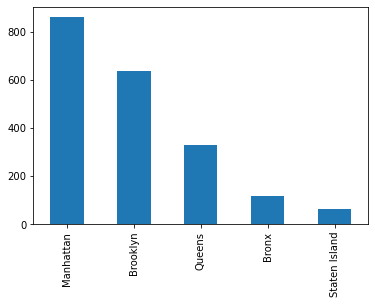

In [50]:
# create a bar graph that shows how many of the businesses are located in each nyc borough

df_c2['establishment_record_establishment_borough'].value_counts().plot(kind='bar')

### 3.9 | Plot distribution using a histogram

<AxesSubplot:ylabel='Frequency'>

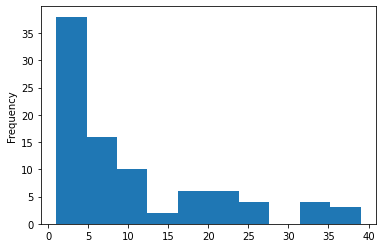

In [111]:
df_a['Age'].value_counts().plot(kind='hist')

### 3.10 | Plot distribution using a boxplot

<AxesSubplot:>

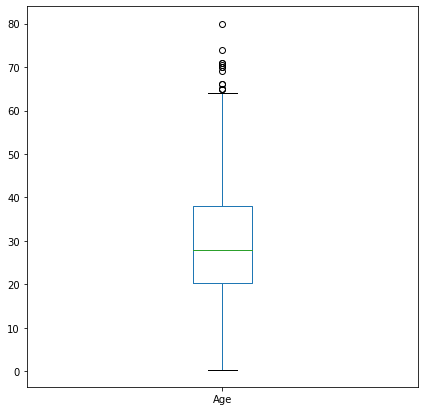

In [83]:
df_a['Age'].plot(kind='box',figsize=(7,7))

### 3.11 | compare two variables using a scatter plot

<AxesSubplot:xlabel='Age', ylabel='Fare'>

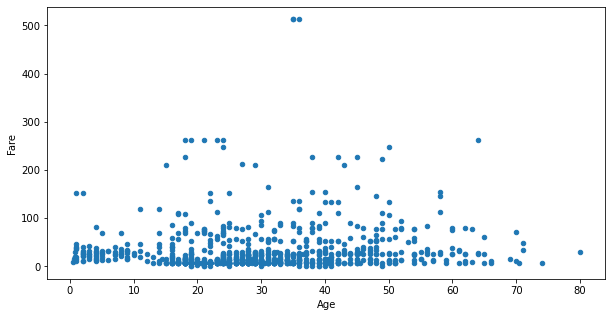

In [97]:
df_a.plot(kind='scatter',x='Age', y='Fare',figsize=(10,5))

### 3.12 | Plot data on a line graph

<AxesSubplot:xlabel='Age'>

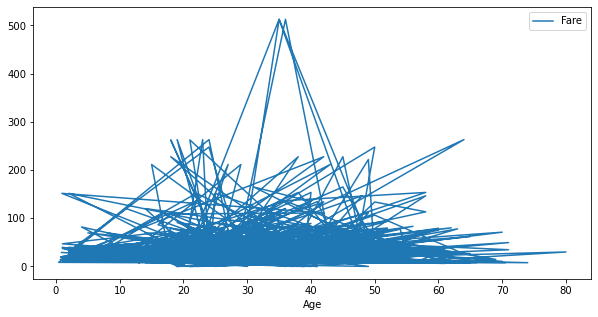

In [109]:
df_a.plot(kind='line',x='Age', y='Fare',figsize=(10,5))

### 3.13 | Plot numerical data using an aggregate funtcion

<AxesSubplot:>

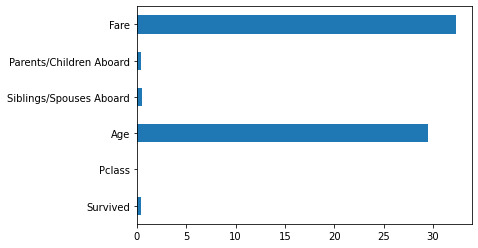

In [68]:
df_a.mean().plot(kind='barh')

**Available pandas Plots:**

| kindstr   | The kind of plot to produce    |
|-----------|--------------------------------|
| ‘line’    | line plot (default)            |
| ‘bar’     | vertical bar plot              |
| ‘barh’    | horizontal bar plot            |
| ‘hist’    | histogram                      |
| ‘box’     | boxplot                        |
| ‘kde’     | Kernel Density Estimation plot |
| ‘density’ | same as ‘kde’                  |
| ‘area’    | area plot                      |
| ‘pie’     | pie plot                       |
| ‘scatter’ | scatter plot (DataFrame only)  |
| ‘hexbin’  | hexbin plot (DataFrame only)   |



## **4. Final takeaways** 

### *Exemplar copy for published analysis, section 4.:*

-  Since its inception, the NYC Business Acceleration program has assisted more than 5,000 buisnesses.
-  The vast majority of these businesses are in the accomodations and food sector.
-  In all, the businesses employ more than 56,000 people.